#Name :- Yash Bhargava
#Section :- T2    ClassRno :- 53
#University RollNo :- 2115500160 


# k-nearest neighbors algorithm

Importing Required Modules

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Dataset

In [ ]:
boss = pd.read_csv("/content/drive/MyDrive/HousingData.csv")

info prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [ ]:
boss

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.20,4.0900,1,296,15.3,396.90,4.980,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.90,4.9671,2,242,17.8,396.90,9.140,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.10,4.9671,2,242,17.8,392.83,4.030,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.80,6.0622,3,222,18.7,394.63,2.940,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.20,6.0622,3,222,18.7,396.90,3.023,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.10,2.4786,1,273,21.0,391.99,13.250,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.70,2.2875,1,273,21.0,396.90,9.080,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.00,2.1675,1,273,21.0,396.90,5.640,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.30,2.3889,1,273,21.0,393.45,6.480,22.0


In [ ]:
boss.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.20  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.90  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.10  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.80  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.20  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.10  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.70  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.00  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.30  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  87.56  2.5050    1  273   

     PTRATIO       B   LSTAT  MEDV  
0       15.3  396.90   4.980  24.0  
1    

printing the rows and columns in dataset using shape property

In [ ]:
boss.shape

(506, 14)

Printing the number of null records in dataset

In [ ]:
boss.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Splitting data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
x = np.array(boss.iloc[:, 0:13])
y = np.array(boss["MEDV"])
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 101)
x_train

array([[2.00900e-02, 9.50000e+01, 2.68000e+00, ..., 1.47000e+01,
        3.90550e+02, 2.88000e+00],
       [6.53876e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.92050e+02, 2.96000e+00],
       [3.67367e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.88620e+02, 1.05800e+01],
       ...,
       [3.04100e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.94810e+02, 1.05600e+01],
       [1.17470e-01, 1.25000e+01, 7.87000e+00, ..., 1.52000e+01,
        3.96900e+02, 1.32700e+01],
       [7.95000e-02, 6.00000e+01, 1.69000e+00, ..., 1.83000e+01,
        3.70780e+02, 5.49000e+00]])

Importing KNeighborsRegressor from sklearn's submodule neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

Creating KNeighborsRegressor object and passing value of k as 3

In [ ]:
Nn = KNeighborsRegressor(3)
Nn.fit(x_train,y_train)
y_pred = Nn.predict(x_test)

Here we are printing the values of Errors for different values of k that is number of nearest neighbors

In [ ]:
import sklearn
X_axis = [i for i in range(1,50)]
Y_axis = []
for i in range(1,50):
  model = KNeighborsRegressor(i)
  model.fit(x_train,y_train)
  pred_y = model.predict(x_test)
  mse = sklearn.metrics.mean_squared_error(y_test, pred_y,squared = False)
  Y_axis.append(mse)
  print(f"Error for k({i}) = {mse}")

Error for k(1) = 8.144319137320585
Error for k(2) = 7.362913825381905
Error for k(3) = 7.277389782523925
Error for k(4) = 7.324251690715398
Error for k(5) = 7.090369116662849
Error for k(6) = 7.102725776087121
Error for k(7) = 7.30945380518836
Error for k(8) = 7.317548864310983
Error for k(9) = 7.392106980694685
Error for k(10) = 7.481613207337742
Error for k(11) = 7.500046469335524
Error for k(12) = 7.582445033041358
Error for k(13) = 7.589712484434928
Error for k(14) = 7.645194836958641
Error for k(15) = 7.6903280563338186
Error for k(16) = 7.731008687278757
Error for k(17) = 7.808745546595389
Error for k(18) = 7.908051316563778
Error for k(19) = 7.986393072209404
Error for k(20) = 8.083727146086044
Error for k(21) = 8.131958448603278
Error for k(22) = 8.15213439263009
Error for k(23) = 8.165108442088053
Error for k(24) = 8.172955797027218
Error for k(25) = 8.174827253928914
Error for k(26) = 8.200062968089275
Error for k(27) = 8.188625245151366
Error for k(28) = 8.21928578616089
Err

Creating scatter plot between Number of nearest neighbours and mean sqaured error.

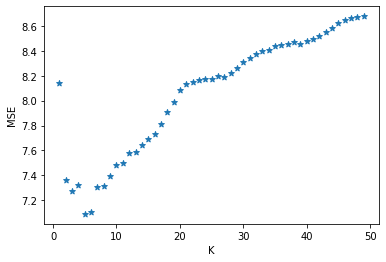

In [ ]:
plt.scatter(X_axis, Y_axis, marker = '*')
plt.xlabel("K")
plt.ylabel("MSE")
plt.show()

In [ ]:
r2_score(y_test, y_pred)

0.4664485393253689

# Conclusion

For the given dataset, if we take k = 5 (number of nearest neighbors), the model has least error that is 6.744 appx.